# Análisis de datos Covid 2020


In [1]:
# Librerias:
library(tidyverse)
library(corrplot)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

corrplot 0.92 loaded



In [2]:
# http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip,
Datos <- read_csv("covid_dataset.csv")
# Datos totales. Datos <- read_csv("220424COVID19MEXICO.csv")

Rows: 100000 Columns: 40
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr   (7): ID_REGISTRO, ENTIDAD_UM, ENTIDAD_NAC, ENTIDAD_RES, MUNICIPIO_RES,...
dbl  (29): ORIGEN, SECTOR, SEXO, TIPO_PACIENTE, INTUBADO, NEUMONIA, EDAD, NA...
date  (4): FECHA_ACTUALIZACION, FECHA_INGRESO, FECHA_SINTOMAS, FECHA_DEF

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# Resumen estadístico
summary(Datos)
# Tipo de datos
glimpse(Datos)

 FECHA_ACTUALIZACION  ID_REGISTRO            ORIGEN         SECTOR      
 Min.   :2020-12-25   Length:100000      Min.   :1.00   Min.   : 1.000  
 1st Qu.:2020-12-25   Class :character   1st Qu.:1.00   1st Qu.: 4.000  
 Median :2020-12-25   Mode  :character   Median :2.00   Median :12.000  
 Mean   :2020-12-25                      Mean   :1.67   Mean   : 9.406  
 3rd Qu.:2020-12-25                      3rd Qu.:2.00   3rd Qu.:12.000  
 Max.   :2020-12-25                      Max.   :2.00   Max.   :13.000  
                                                                        
  ENTIDAD_UM             SEXO       ENTIDAD_NAC        ENTIDAD_RES       
 Length:100000      Min.   :1.000   Length:100000      Length:100000     
 Class :character   1st Qu.:1.000   Class :character   Class :character  
 Mode  :character   Median :1.000   Mode  :character   Mode  :character  
                    Mean   :1.485                                        
                    3rd Qu.:2.000             

Rows: 100,000
Columns: 40
$ FECHA_ACTUALIZACION   <date> 2020-12-25, 2020-12-25, 2020-12-25, 2020-12-25,…
$ ID_REGISTRO           <chr> "3f4171", "2fd222", "0838e2", "2bc493", "31ed7f"…
$ ORIGEN                <dbl> 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, …
$ SECTOR                <dbl> 12, 12, 5, 4, 4, 9, 12, 12, 4, 12, 12, 12, 12, 1…
$ ENTIDAD_UM            <chr> "09", "09", "20", "06", "23", "19", "19", "21", …
$ SEXO                  <dbl> 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, …
$ ENTIDAD_NAC           <chr> "09", "09", "15", "14", "30", "19", "19", "09", …
$ ENTIDAD_RES           <chr> "09", "09", "20", "06", "23", "19", "19", "21", …
$ MUNICIPIO_RES         <chr> "005", "007", "160", "010", "005", "039", "006",…
$ TIPO_PACIENTE         <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, …
$ FECHA_INGRESO         <date> 2020-10-20, 2020-12-04, 2020-04-17, 2020-11-24,…
$ FECHA_SINTOMAS        <date> 2020-10-20, 2020-12-01, 2020-04-14, 2020-11-21,…
$ FECHA_DEF   

In [4]:
# Data frame con los resgistros de casos positivos
Casos_positivos <- Datos %>% select(CLASIFICACION_FINAL) %>%
  filter(CLASIFICACION_FINAL == 1 | CLASIFICACION_FINAL == 2 | CLASIFICACION_FINAL == 3 ) %>%
  summarise("Casos Positivos" = n())

Casos_positivos

Casos Positivos
<int>
39220


In [5]:
# El numero de registros nulos por columna 
Datos_faltantes <- Datos %>% 
    sapply(is.na) %>% 
    as.data.frame() %>% 
    apply(2,sum) %>% 
    as.data.frame()

Datos_faltantes

,.
,<int>
FECHA_ACTUALIZACION,0
ID_REGISTRO,0
ORIGEN,0
SECTOR,0
ENTIDAD_UM,0
SEXO,0
ENTIDAD_NAC,0
ENTIDAD_RES,0
MUNICIPIO_RES,0


In [6]:
# La media de edades de los contagiados de covid
Media_casos_positivos <- Datos$EDAD %>% mean()
Media_casos_positivos

[1] 41.24766

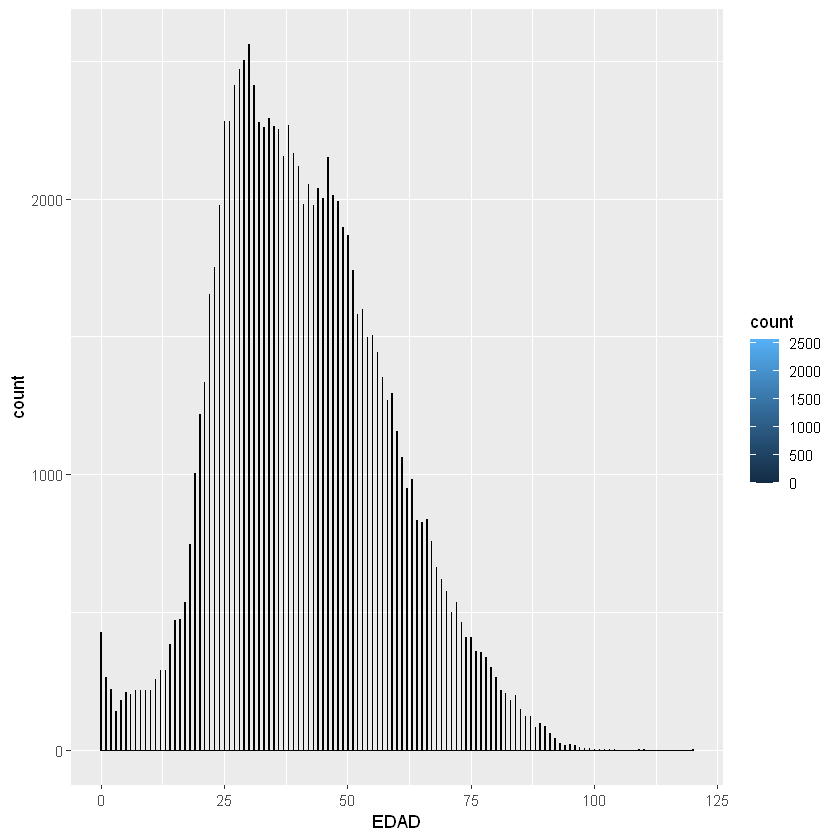

In [7]:
# Histograma de las edades de los contagiados 
ggplot(Datos, aes(x = EDAD)) +
  geom_histogram(binwidth=0.1, aes(fill=..count..), col='black')

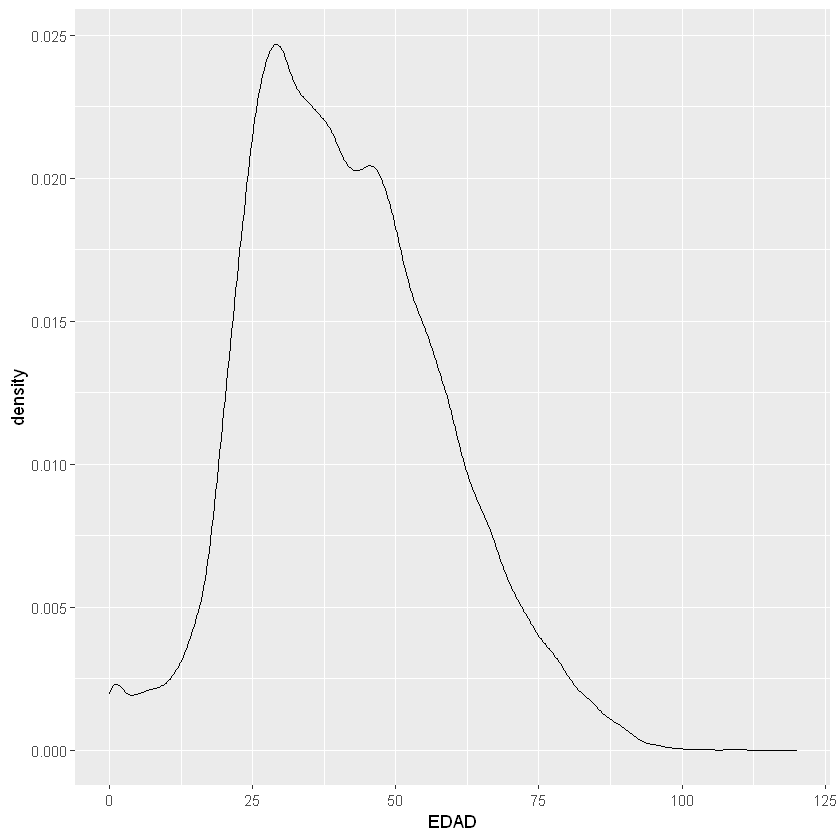

In [8]:
# Grafica de densidad de edades de los contagiados
ggplot(Datos, aes(x = EDAD)) + 
    geom_density(position = "stack")

In [9]:
# Columna nueva al dataframe que tiene valor 1 cuando la fecha
# de defuncion no es valor nulo y 0 cuando es nulo 
# La columna que contiene la fecha de defuncion se llama FECHA_DEF 
Datos_columna_extra <- Datos %>% 
  mutate(Categoria_Defuncion = ifelse(is.na(FECHA_DEF), 0, 1))

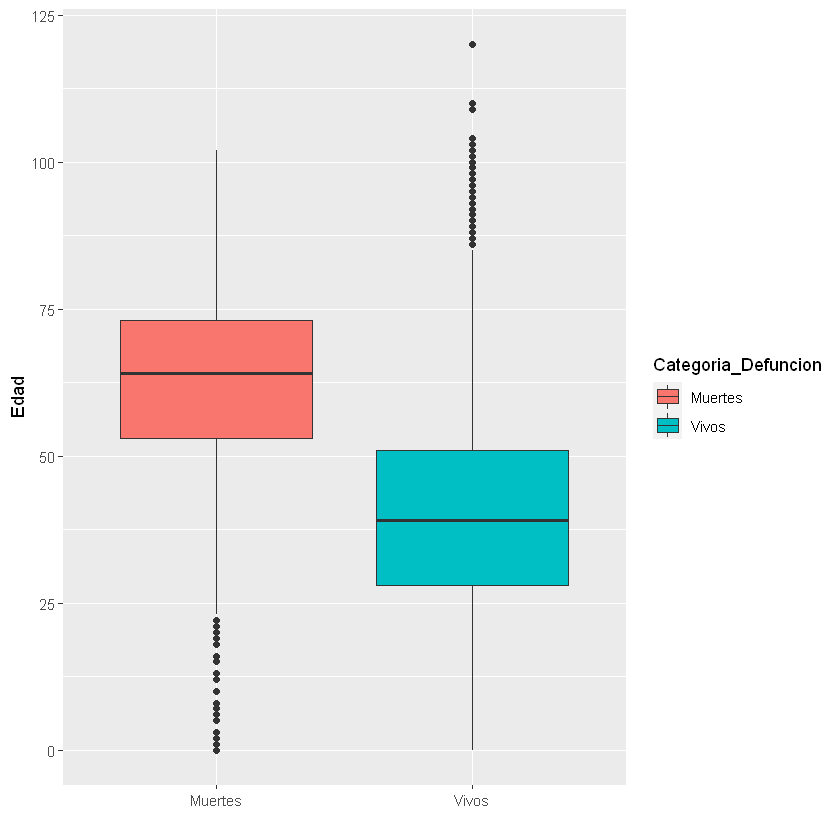

In [10]:
#8) Boxplot de edades de los muertos por covid vs lo que no murieron.

# Cambiamos de nombres de "0" a "Muertes" y "1" a "vivos" para la estetica de la
# gráfica. Con este data frame vamos a graficas los boxplots, por eso no tenemos 
# toda la tabla.

Datos_edad_fallecidos <-  Datos_columna_extra %>% 
  transform(Categoria_Defuncion = case_when(
  Categoria_Defuncion == 1 ~ "Muertes",
  TRUE ~ "Vivos"
  )) 


ggplot(data = Datos_edad_fallecidos, aes(x = as.factor(Categoria_Defuncion),
                                         y =  EDAD, fill = Categoria_Defuncion )) + 
  geom_boxplot() + ylab("Edad") + xlab("")



 Observaciones. Se distinque el hecho de que las personas fallecidas estaban en una edad superior a los 60 a?os,
 son atipicos las muertes en menores de 25 a?os, donde la mayoria de las personas contagiadas
 no fallecieron. 

In [11]:
summary(Datos_edad_fallecidos) 

 FECHA_ACTUALIZACION  ID_REGISTRO            ORIGEN         SECTOR      
 Min.   :2020-12-25   Length:100000      Min.   :1.00   Min.   : 1.000  
 1st Qu.:2020-12-25   Class :character   1st Qu.:1.00   1st Qu.: 4.000  
 Median :2020-12-25   Mode  :character   Median :2.00   Median :12.000  
 Mean   :2020-12-25                      Mean   :1.67   Mean   : 9.406  
 3rd Qu.:2020-12-25                      3rd Qu.:2.00   3rd Qu.:12.000  
 Max.   :2020-12-25                      Max.   :2.00   Max.   :13.000  
                                                                        
  ENTIDAD_UM             SEXO       ENTIDAD_NAC        ENTIDAD_RES       
 Length:100000      Min.   :1.000   Length:100000      Length:100000     
 Class :character   1st Qu.:1.000   Class :character   Class :character  
 Mode  :character   Median :1.000   Mode  :character   Mode  :character  
                    Mean   :1.485                                        
                    3rd Qu.:2.000             

In [12]:
#9)Transformar la columna CLASIFICACION_FINAL, con el valor de 1 si tiene 1, 2 o 3 como valor y que tenga 0 en cualquier otro caso

Datos_Mod_Clas_Fin <- Datos %>% transform(CLASIFICACION_FINAL = case_when(
CLASIFICACION_FINAL == 1 ~ 1,
CLASIFICACION_FINAL == 2 ~ 1,
CLASIFICACION_FINAL == 3 ~ 1,
TRUE ~ 0
))

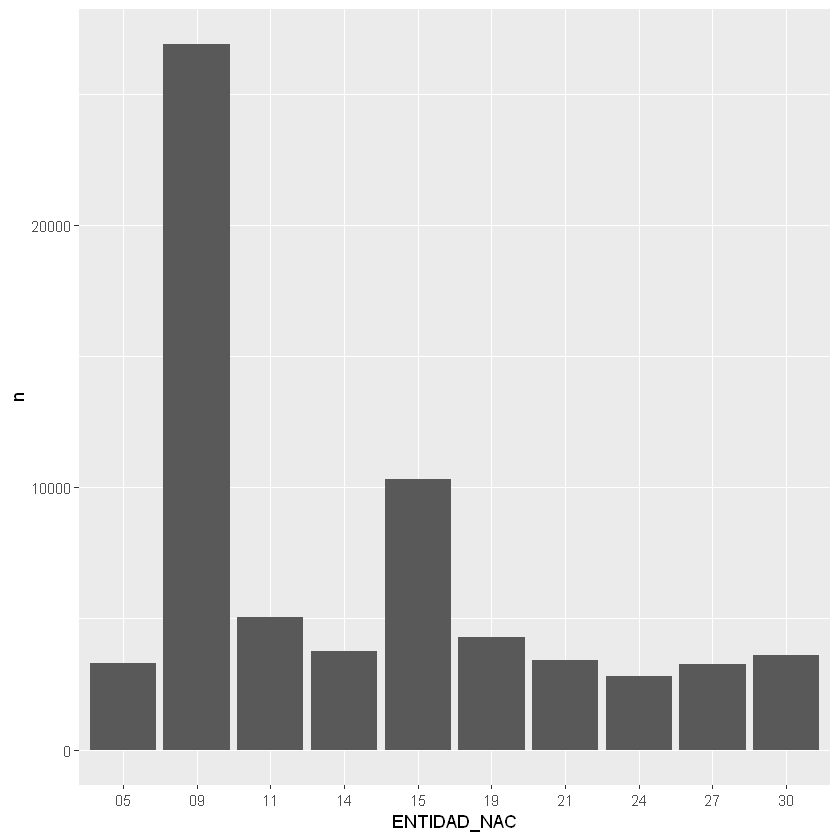

In [13]:
# El numero de casos positivos agrupado por estado
# y una grafica de barras de los 10 estados con mas casos

Datos_estados <- Datos_Mod_Clas_Fin %>% 
  group_by(ENTIDAD_NAC) %>% 
  summarize("n" = n()) %>% 
  arrange(desc(n)) 

ggplot(Datos_estados[1:10,], aes(x = ENTIDAD_NAC, y = n)) + geom_bar(stat="identity")

In [14]:
# Rename la columna llamada CLASIFICACION FINAL para que ahora su nombre sea: "CONTAGIADO"
names(Datos)

Datos  <- Datos %>% rename(CONTAGIADO = CLASIFICACION_FINAL)


[1] "FECHA_ACTUALIZACION"   "ID_REGISTRO"           "ORIGEN"               
 [4] "SECTOR"                "ENTIDAD_UM"            "SEXO"                 
 [7] "ENTIDAD_NAC"           "ENTIDAD_RES"           "MUNICIPIO_RES"        
[10] "TIPO_PACIENTE"         "FECHA_INGRESO"         "FECHA_SINTOMAS"       
[13] "FECHA_DEF"             "INTUBADO"              "NEUMONIA"             
[16] "EDAD"                  "NACIONALIDAD"          "EMBARAZO"             
[19] "HABLA_LENGUA_INDIG"    "INDIGENA"              "DIABETES"             
[22] "EPOC"                  "ASMA"                  "INMUSUPR"             
[25] "HIPERTENSION"          "OTRA_COM"              "CARDIOVASCULAR"       
[28] "OBESIDAD"              "RENAL_CRONICA"         "TABAQUISMO"           
[31] "OTRO_CASO"             "TOMA_MUESTRA_LAB"      "RESULTADO_LAB"        
[34] "TOMA_MUESTRA_ANTIGENO" "RESULTADO_ANTIGENO"    "CLASIFICACION_FINAL"  
[37] "MIGRANTE"              "PAIS_NACIONALIDAD"     "PAIS_ORIGEN"          
[40] "UCI"

In [15]:
# Una funcion que al aplicarla nos diga el procentaje del total de registros que estan contagiados por Covid

mi_dataframe <- read_csv("covid_dataset.csv")

porcentaje_contagiados <- function(mi_dataframe) {
    mi_dataframe %>% 
    transform(CONTAGIADO = case_when(
      CONTAGIADO == 1 ~ 1,
      CONTAGIADO == 2 ~ 1,
      CONTAGIADO == 3 ~ 1,
      TRUE ~ 0
    )) %>%
    select(CONTAGIADO)
    
  sum(mi_dataframe$CONTAGIADO) / length(mi_dataframe$CONTAGIADO) * 100 
  
  }

Rows: 100000 Columns: 40
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr   (7): ID_REGISTRO, ENTIDAD_UM, ENTIDAD_NAC, ENTIDAD_RES, MUNICIPIO_RES,...
dbl  (29): ORIGEN, SECTOR, SEXO, TIPO_PACIENTE, INTUBADO, NEUMONIA, EDAD, NA...
date  (4): FECHA_ACTUALIZACION, FECHA_INGRESO, FECHA_SINTOMAS, FECHA_DEF

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [16]:
porcentaje_contagiados(Datos)

[1] 526.275

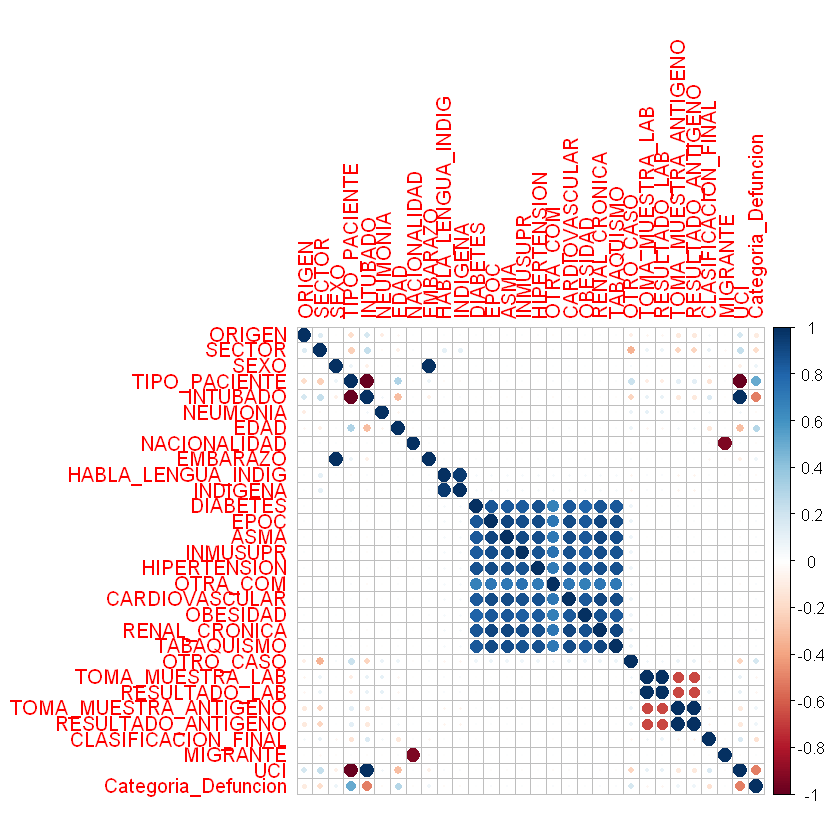

In [17]:
#13)Realiza una matriz de corrrelacion entre las variables numericas 

nums <- unlist(lapply(Datos_columna_extra, is.numeric)) 
Datos_numericos <- Datos_columna_extra[,nums]

cor(Datos_numericos) %>% corrplot()

Se concluye la relacion entre las mujeres embarazadas con la edad. De intubados con UCI, embarazos con sexo pero esa es un poco evidente. Es importante recalcar que existe una correlación mayor con las enfermedades
respiratorias y cardiacas. 

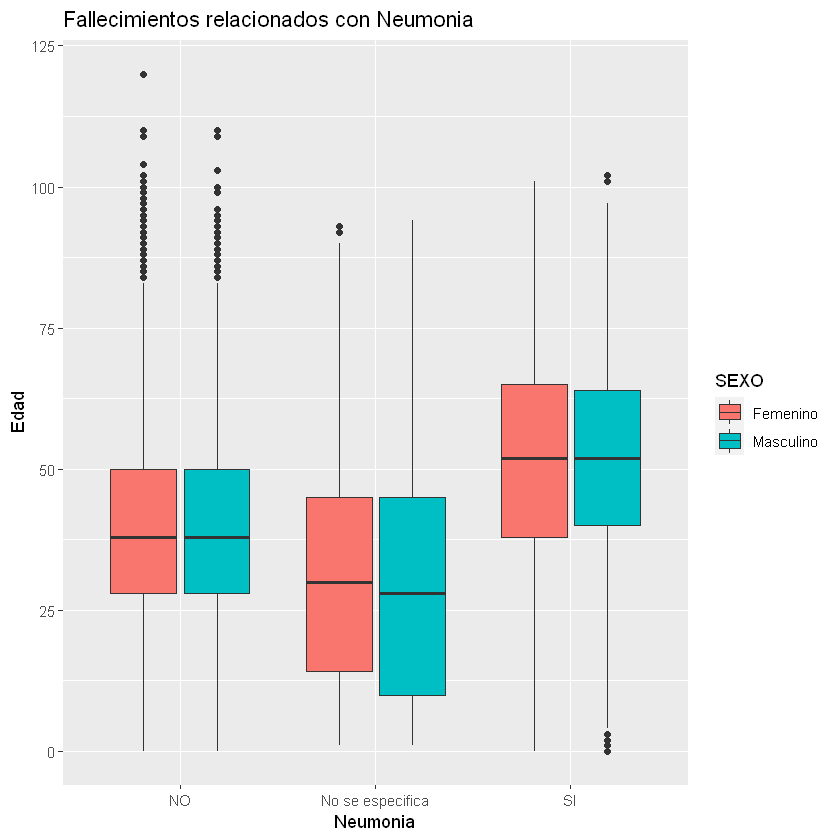

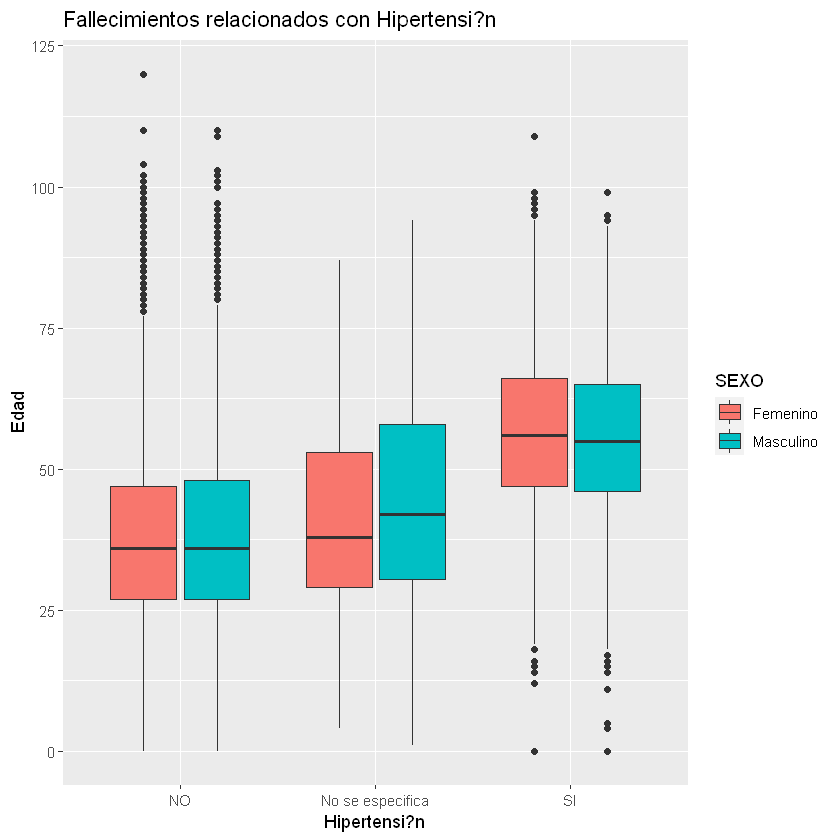

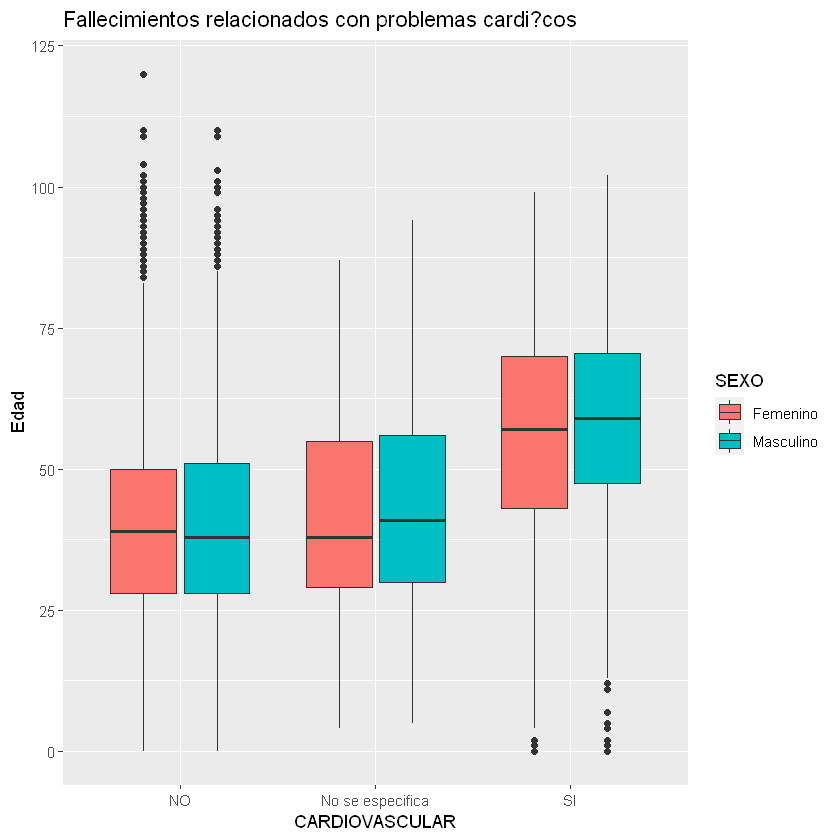

In [18]:
# Vamos a ver la relacion que existe entre fallecimientos con, intubados e hipertensos. Vimos
# Que la edad fue un factor importante.

# Este data frame es con datos de personas que fallecieron
Prom_14 <- Datos_columna_extra %>% filter(Categoria_Defuncion == 0)  %>%
  select(EDAD, SEXO, NEUMONIA, HIPERTENSION, CARDIOVASCULAR) %>%
 transform(SEXO = case_when(
  SEXO == 1 ~ "Femenino",
  SEXO == 2 ~ "Masculino",
  TRUE ~ "No se especifica"
 )) %>% 
  transform(NEUMONIA = case_when(
    NEUMONIA == 1 ~ "SI",
    NEUMONIA == 2 ~ "NO",
    NEUMONIA == 97 ~ "No aplica",
    TRUE ~ "No se especifica"
  )) %>% 
  transform(HIPERTENSION = case_when(
    HIPERTENSION == 1 ~ "SI",
    HIPERTENSION == 2 ~ "NO",
    HIPERTENSION == 97 ~ "No aplica",
    TRUE ~ "No se especifica"
  )) %>% 
  transform(CARDIOVASCULAR = case_when(
    CARDIOVASCULAR == 1 ~ "SI",
    CARDIOVASCULAR == 2 ~ "NO",
    CARDIOVASCULAR == 97 ~ "No aplica",
    TRUE ~ "No se especifica"
  ))  


ggplot(data = Prom_14, aes(x = as.factor(NEUMONIA), y =  EDAD, fill = SEXO )) + 
  geom_boxplot() + ylab("Edad") + xlab("Neumonia") + ggtitle("Fallecimientos relacionados con Neumonia")
 

ggplot(data = Prom_14, aes(x = as.factor(HIPERTENSION), y =  EDAD, fill = SEXO )) + 
  geom_boxplot() + ylab("Edad") + xlab("Hipertensi?n") + ggtitle("Fallecimientos relacionados con Hipertensi?n")


ggplot(data = Prom_14, aes(x = as.factor(CARDIOVASCULAR), y =  EDAD, fill = SEXO )) + 
  geom_boxplot() + ylab("Edad") + xlab("CARDIOVASCULAR") + ggtitle("Fallecimientos relacionados con problemas cardi?cos")

Comentario: Se observa que las enfermedades relacionadas con el fallecimiento de las personas est? relacionadas con la edad. Por lo tanto el sustento de que la vacunaci?n sea por bloques de de edad est? sustentado. M?s a?n las personas con edad menor a 50 a?os que dieron positivo a covid no fallecieron, quedando los lamentables decesos como valores atipicos. 

In [19]:
Calculos <- Datos_columna_extra %>% filter(Categoria_Defuncion == 0)  %>%
  select( NEUMONIA, HIPERTENSION, CARDIOVASCULAR) %>%
  transform(NEUMONIA = case_when(
    NEUMONIA == 1 ~ 1,
    NEUMONIA == 2 ~ 0,
    NEUMONIA == 97 ~ 0,
    TRUE ~ 0
  )) %>% 
  transform(HIPERTENSION = case_when(
    HIPERTENSION == 1 ~ 1,
    HIPERTENSION == 2 ~ 0,
    HIPERTENSION == 97 ~ 0,
    TRUE ~ 0
  )) %>% 
  transform(CARDIOVASCULAR = case_when(
    CARDIOVASCULAR == 1 ~ 1,
    CARDIOVASCULAR == 2 ~ 0,
    CARDIOVASCULAR == 97 ~ 0,
    TRUE ~ 0
  )) %>%
  sapply(sum) %>% as.data.frame()


(Calculos <- Calculos/length(Prom_14$EDAD) *100) 



,.
,<dbl>
NEUMONIA,6.684273
HIPERTENSION,13.313834
CARDIOVASCULAR,1.349901


Comentarios: Los calculos anteriores muestran que la porci?n de la presencia# de enfermedades cardio respiraotiras en los casos donde la persona lamentablemente falleció. Dando que estas personas fueron y son el sector mas susceptible a la enfermedad en cuestión.